# Cleaning and Exploratory Data Analysis


**Identifies which of the three proposals you outlined in your lightning talk you have chosen**

I have chosen to analyze twitter data (tweets) of United States Senators and Representatives from the start of 2018 to the end of 2020. I will attempt to determine if there is greater diversity in political groupings than simply Republican and Democrat based on the language used by these public figures.


**Articulates the main goal of your project (your problem statement)**

Using Natural Language Processing (NLP) and the unsupervised models of DBSCAN or K-Means clustering, I will examine twitter data (tweets) to determine if there is greater diversity in political ideology than simply Republican and Democrat. Specifically, are there more clearly defined clusters of political ideologies? Lastly, I will outline the characteristics or language that makes each cluster unique.


**Outlines your proposed methods and models**

I will use Natural Language Processing (NLP) and model with DBSCAN clustering or K-Means clustering.  SpaCy, an NLP python library, will be used to help me process the tweets. This will be the MVP.

Some stretch goals would be a sentiment analysis of the tweets by these clusters but perhaps also by political affiliation

A final, very stretched out goal, would be to create a dashboard or web app that updates automatically with the sentiments of the day from members of the US Congress.


**Defines the risks & assumptions of your data**

An assumption I am operating on is that the tweets will be qualitatively different and so will yield interesting findings. This may not actually be the case.

A risk of this project is that the data will have a high level of dimensionality and so may prove somewhat difficult to navigate.


**Revises initial goals & success criteria, as needed**

This will be necessary.


**Initial data source**

Tweets scraped from archive found at: 
- https://github.com/alexlitel/congresstweets

Twitter handles of elected Senators and Representatives found at: 
- https://www.sbh4all.org/wp-content/uploads/2019/04/116th-Congress-Twitter-Handles.pdf

Political party affiliations:
- https://en.wikipedia.org/wiki/116th_United_States_Congress

## Read in Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Preliminary Cleaning, Creation of Dataframe

### Skip if dataframe has already been created and skip to "Read In Cleaned Data and Further EDA" section

In [2]:
# Tweets of the 116th Congress (Jan 3, 2019 - Jan 3, 2021)
df116_1 = pd.read_csv('../data/scrape/tweet_df_116_1.csv')
df116_2 = pd.read_csv('../data/scrape/tweet_df_116_2.csv')
df116_3 = pd.read_csv('../data/scrape/tweet_df_116_3.csv')
df116_4 = pd.read_csv('../data/scrape/tweet_df_116_4.csv')
df116_5 = pd.read_csv('../data/scrape/tweet_df_116_5.csv')
df116_6 = pd.read_csv('../data/scrape/tweet_df_116_6.csv')
df116_7 = pd.read_csv('../data/scrape/tweet_df_116_7.csv')
df116_8 = pd.read_csv('../data/scrape/tweet_df_116_8.csv')
df116_9 = pd.read_csv('../data/scrape/tweet_df_116_9.csv')
df116_10 = pd.read_csv('../data/scrape/tweet_df_116_10.csv')
df116_11 = pd.read_csv('../data/scrape/tweet_df_116_11.csv')
df116_12 = pd.read_csv('../data/scrape/tweet_df_116_12.csv')
df116_13 = pd.read_csv('../data/scrape/tweet_df_116_13.csv')
df116_14 = pd.read_csv('../data/scrape/tweet_df_116_14.csv')
df116_15 = pd.read_csv('../data/scrape/tweet_df_116_15.csv')

# datafiles containing only elected senators / reps, political affiliation, state
# excludes special interest groups / personal twitter handles / lobbyists, etc.
df116_handles = pd.read_csv('../data/twitter_handles/116_congress_list.csv')

# keeping only certain columns that will be used
columns_keep =['id','screen_name','user_id','time','link','text','source']

In [3]:
# 116th Congress
df116_1 = df116_1[columns_keep]
df116_2 = df116_2[columns_keep]
df116_3 = df116_3[columns_keep]
df116_4 = df116_4[columns_keep]
df116_5 = df116_5[columns_keep]
df116_6 = df116_6[columns_keep]
df116_7 = df116_7[columns_keep]
df116_8 = df116_8[columns_keep]
df116_9 = df116_9[columns_keep]
df116_10 = df116_10[columns_keep]
df116_11 = df116_11[columns_keep]
df116_12 = df116_12[columns_keep]
df116_13 = df116_13[columns_keep]
df116_14 = df116_14[columns_keep]
df116_15 = df116_15[columns_keep]

In [4]:
print(df116_1.shape)
print('---------------')
df116_1.head(2)

(126562, 7)
---------------


,id,screen_name,user_id,time,link,text,source
0,1267667665834913793,CAPAC,192955168.0,2020-06-02T00:01:38-04:00,https://www.twitter.com/RepTjCox/statuses/1267...,RT @RepTjCox Today is the start of #PrideMonth...,Twitter for iPhone
1,1267667548880998400,CAPAC,192955168.0,2020-06-02T00:01:10-04:00,https://www.twitter.com/RepJayapal/statuses/12...,RT @RepJayapal Donald Trump cozied up to dicta...,Twitter for iPhone


In [5]:
print(df116_2.shape)
print('---------------')
df116_2.head(2)

(126561, 7)
---------------


,id,screen_name,user_id,time,link,text,source
0,1252338656012046336,RepKClark,2.293131e+09,2020-04-20T16:49:37-04:00,https://www.twitter.com/RepKClark/statuses/125...,I've received questions on the #CARESAct direc...,Twitter Web App
1,1252390683966443522,chiproytx,1.257667e+09,2020-04-20T20:16:22-04:00,https://www.twitter.com/chiproytx/statuses/125...,Yessir. Happy to do it and we’ll do more call...,Twitter for iPhone


In [6]:
print(df116_3.shape)
print('---------------')
df116_3.head(2)

(126562, 7)
---------------


,id,screen_name,user_id,time,link,text,source
0,1238608080071462916,SenTedCruz,1.074480e+09,2020-03-13T19:29:13-04:00,https://www.twitter.com/ABCNewsLive/statuses/1...,RT @ABCNewsLive Sen. Ted Cruz placed himself i...,Twitter for iPhone
1,1238522651355865089,RepThomasMassie,9.752005e+08,2020-03-13T13:49:45-04:00,https://www.twitter.com/RepThomasMassie/status...,Many Republican house members would like to se...,Twitter for iPhone


In [7]:
print(df116_4.shape)
print('---------------')
df116_4.head(2)

(126561, 7)
---------------


,id,screen_name,user_id,time,link,text,source
0,1222725512495271937,RepValDemings,7.989730e+17,2020-01-29T22:37:33-05:00,https://www.twitter.com/HouseIntel/statuses/12...,RT @HouseIntel “Now apparently it’s ok for a p...,Twitter for iPhone
1,1222523538004942848,JenniferWexton,2.212905e+09,2020-01-29T09:14:59-05:00,https://www.twitter.com/GiffordsCourage/status...,"RT @GiffordsCourage In 2018, we helped @Jennif...",Twitter for iPhone


In [8]:
print(df116_handles.shape)
print('---------------')
df116_handles.head(3)

(531, 6)
---------------


,state,position,name,screen_name,party,congress
0,NC,Representative,Alma Adams,RepAdams,D,116
1,AL,Representative,Robert Aderholt,Robert_Aderholt,R,116
2,CA,Representative,Pete Aguilar,RepPeteAguilar,D,116


In [9]:
# combining the 116th Congress dfs and removing duplicates
df116 = pd.concat([df116_1, df116_2, df116_3, df116_4, df116_5, df116_6, df116_7, df116_8, df116_9, df116_10, df116_11, df116_12, df116_13, df116_14, df116_15], axis=0, sort=False)
df116 = df116.drop_duplicates()

In [10]:
print(f'116th Congress Tweet df shape: {df116.shape}')
print('---------------')
print(f'116th Congress Elected Officials: {df116_handles.shape}')

# 115th Congress Tweet df shape: (740479, 7)
# 116th Congress Tweet df shape: (1898432, 7)
# ---------------
# 115th Congress Elected Officials: (554, 6)
# 116th Congress Elected Officials: (531, 6)

116th Congress Tweet df shape: (1882106, 7)
---------------
116th Congress Elected Officials: (531, 6)


In [11]:
# ensuring no duplicates in the handles dfs
df116_handles = df116_handles.drop_duplicates()

In [12]:
# merging full tweet set with handles df 
# (list of actually elected officials, official govt twitter handle)
# keeping only those who appear in the handles df

# 116th congress merge
df116_ = pd.merge(df116, df116_handles, on='screen_name')

In [13]:
# Checking the shape of the merged dataset
print(f'116th Congress Elected Official Tweets: {df116_.shape}')

# 115th Congress Elected Official Tweets: (368098, 12)
# 116th Congress Elected Official Tweets: (1124765, 12)

116th Congress Elected Official Tweets: (1115004, 12)


In [14]:
# Creating the final dataframe for the 116th Congresses
df = df116_

In [15]:
# ensuring no duplicates in the final df
df = df.drop_duplicates()


In [16]:
print(df.shape)
print('---------------')
df.tail(10)

# (1492863, 12)

(1115004, 12)
---------------


,id,screen_name,user_id,time,link,text,source,state,position,name,party,congress
1114994,1095066508450021381,RepWalterJones,26778110.0,2019-02-11T16:06:15-05:00,https://www.twitter.com/RepWalterJones/statuse...,"(1/2) From 4pm to 8pm on Wednesday, February 1...",Twitter for iPhone,NC,Representative,Walter Jones,R,116
1114995,1095066510098399232,RepWalterJones,26778110.0,2019-02-11T16:06:16-05:00,https://www.twitter.com/RepWalterJones/statuse...,(2/2) The funeral will be held at St. Peter Ca...,Twitter for iPhone,NC,Representative,Walter Jones,R,116
1114996,1094734618673205250,RepWalterJones,26778110.0,2019-02-10T18:07:26-05:00,https://www.twitter.com/RepWalterJones/statuse...,With a kind heart and the courage of his convi...,Twitter for iPhone,NC,Representative,Walter Jones,R,116
1114997,1092816507237736450,RepWalterJones,26778110.0,2019-02-05T11:05:33-05:00,https://www.twitter.com/RepWalterJones/statuse...,The #IRS is now accepting and processing tax r...,Twitter Web Client,NC,Representative,Walter Jones,R,116
1114998,1087824613197918208,RepWalterJones,26778110.0,2019-01-22T16:29:33-05:00,https://www.twitter.com/RepWalterJones/statuse...,(1/3) Commercial fishermen eligible for the st...,Twitter Web Client,NC,Representative,Walter Jones,R,116
1114999,1087824687693025283,RepWalterJones,26778110.0,2019-01-22T16:29:51-05:00,https://www.twitter.com/RepWalterJones/statuse...,"(2/3) The division had set a Jan. 4, 2019 dead...",Twitter Web Client,NC,Representative,Walter Jones,R,116
1115000,1087824729589891073,RepWalterJones,26778110.0,2019-01-22T16:30:00-05:00,https://www.twitter.com/RepWalterJones/statuse...,(3/3) Any resident commercial fisherman or she...,Twitter Web Client,NC,Representative,Walter Jones,R,116
1115001,1086386668226134016,RepWalterJones,26778110.0,2019-01-18T17:15:40-05:00,https://www.twitter.com/RepWalterJones/statuse...,An unborn child is a gift from God that is ent...,Twitter Web Client,NC,Representative,Walter Jones,R,116
1115002,1085977321524379650,RepWalterJones,26778110.0,2019-01-17T14:09:04-05:00,https://www.twitter.com/RepWalterJones/statuse...,The deadline for North Carolinians who are eli...,Twitter Web Client,NC,Representative,Walter Jones,R,116
1115003,1086024404759388160,RepWalterJones,26778110.0,2019-01-17T17:16:10-05:00,https://www.twitter.com/RepWalterJones/statuse...,Proud to introduce legislation to eliminate re...,Twitter Web Client,NC,Representative,Walter Jones,R,116


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115004 entries, 0 to 1115003
Data columns (total 12 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1115004 non-null  object 
 1   screen_name  1115000 non-null  object 
 2   user_id      1115000 non-null  float64
 3   time         1115000 non-null  object 
 4   link         1115000 non-null  object 
 5   text         1115000 non-null  object 
 6   source       1115000 non-null  object 
 7   state        1115004 non-null  object 
 8   position     1115004 non-null  object 
 9   name         1115004 non-null  object 
 10  party        1115004 non-null  object 
 11  congress     1115004 non-null  int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 110.6+ MB


In [18]:
# checking how many null values in each column pre-drop
df.isna().sum()

id             0
screen_name    4
user_id        4
time           4
link           4
text           4
source         4
state          0
position       0
name           0
party          0
congress       0
dtype: int64

In [19]:
# dropping all rows with null values
# 8 rows dropped
df = df.dropna()

df.shape

# (1483095, 12)

(1115000, 12)

In [20]:
# checking how many null values in each column after drop
df.isna().sum()

id             0
screen_name    0
user_id        0
time           0
link           0
text           0
source         0
state          0
position       0
name           0
party          0
congress       0
dtype: int64

In [21]:
# converting user_id from float to int
df['user_id'] = df['user_id'].astype(int)

In [22]:
# Exporting the cleaned dataframe
export_df = df.to_csv('../data/cleaned_df.csv', index = False) 


## Read in Cleaned Data & More EDA

In [23]:
# Importing the finalized dataframe
data = pd.read_csv('../data/cleaned_df.csv')


In [24]:
# Taking 3% of the data to use while coding out EDA. 
# Comment out when ready to apply examination to all data
# Done due to very large size of the dataframe and computational requirements

# data = data.head(int(len(data)*(3/100)))

print(data.shape)
print('---------')
data.head(3)

# (1492855, 12)

(1115000, 12)
---------


,id,screen_name,user_id,time,link,text,source,state,position,name,party,congress
0,1267682738053808129,CongressmanRaja,814179031956488192,2020-06-02T01:01:31-04:00,https://www.twitter.com/CongressmanRaja/status...,Tonight: “The president had staged an elaborat...,Twitter for iPhone,IL,Representative,Raja Krishnamoorthi,D,116
1,1267681644456140800,CongressmanRaja,814179031956488192,2020-06-02T00:57:11-04:00,https://www.twitter.com/CongressmanRaja/status...,"If that doesn’t make you mad, read it again. h...",Twitter for iPhone,IL,Representative,Raja Krishnamoorthi,D,116
2,1267670971730755594,CongressmanRaja,814179031956488192,2020-06-02T00:14:46-04:00,https://www.twitter.com/JStein_WaPo/statuses/1...,RT @JStein_WaPo This reporter should come out ...,Twitter for iPhone,IL,Representative,Raja Krishnamoorthi,D,116


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115000 entries, 0 to 1114999
Data columns (total 12 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   id           1115000 non-null  int64 
 1   screen_name  1115000 non-null  object
 2   user_id      1115000 non-null  int64 
 3   time         1115000 non-null  object
 4   link         1115000 non-null  object
 5   text         1115000 non-null  object
 6   source       1115000 non-null  object
 7   state        1115000 non-null  object
 8   position     1115000 non-null  object
 9   name         1115000 non-null  object
 10  party        1115000 non-null  object
 11  congress     1115000 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 102.1+ MB


In [26]:
data = data[['screen_name','text','state', 'position', 'name', 'party', 'congress' ]]

In [27]:
data.head()

,screen_name,text,state,position,name,party,congress
0,CongressmanRaja,Tonight: “The president had staged an elaborat...,IL,Representative,Raja Krishnamoorthi,D,116
1,CongressmanRaja,"If that doesn’t make you mad, read it again. h...",IL,Representative,Raja Krishnamoorthi,D,116
2,CongressmanRaja,RT @JStein_WaPo This reporter should come out ...,IL,Representative,Raja Krishnamoorthi,D,116
3,CongressmanRaja,"@KevinMKruse Thank you, and I also loved your ...",IL,Representative,Raja Krishnamoorthi,D,116
4,CongressmanRaja,I'm proud to call @GerryConnolly a colleague a...,IL,Representative,Raja Krishnamoorthi,D,116


In [28]:
data['position'].value_counts(normalize=True)

Representative    0.759698
Senator           0.240302
Name: position, dtype: float64

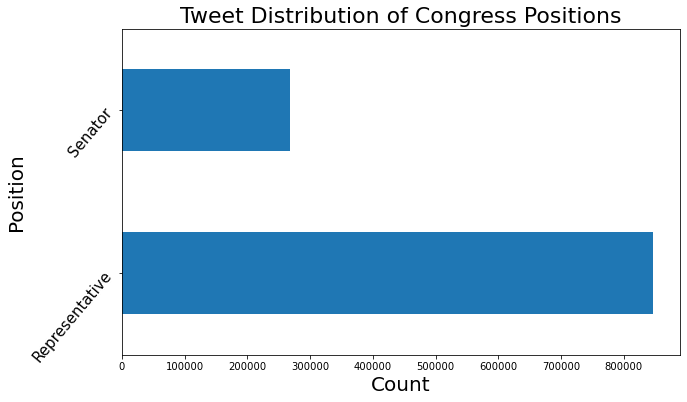

In [29]:
plt.figure(figsize=(10,6))

data['position'].value_counts().plot(kind = 'barh');

plt.title('Tweet Distribution of Congress Positions', fontsize=22)

plt.xlabel('Count', fontsize=20)
plt.yticks(fontsize= 15)
plt.ylabel('Position', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()

In [30]:
data['party'].value_counts(normalize=True)

D    0.637780
R    0.355747
I    0.003411
L    0.003062
Name: party, dtype: float64

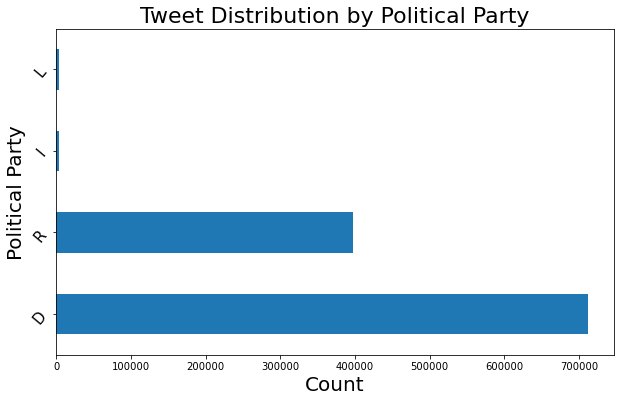

In [31]:
plt.figure(figsize=(10,6))

data['party'].value_counts().plot(kind = 'barh');

plt.title('Tweet Distribution by Political Party', fontsize=22)

plt.xlabel('Count', fontsize=20)
plt.yticks(fontsize= 15)
plt.ylabel('Political Party', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()

In [34]:
data['state'].value_counts(normalize=True)[:10].sort_values(ascending=False)

CA    0.099460
TX    0.081787
FL    0.062637
NY    0.056067
IL    0.045949
PA    0.036291
NJ    0.035515
AZ    0.034430
VA    0.032195
OH    0.029781
Name: state, dtype: float64

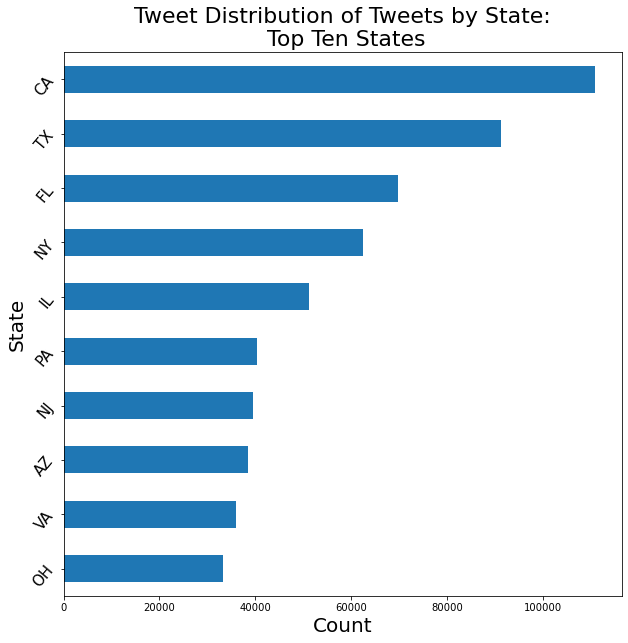

In [35]:
plt.figure(figsize=(10,10))

data['state'].value_counts()[:10].sort_values(ascending=True).plot(kind = 'barh')

plt.title('Tweet Distribution of Tweets by State:\n Top Ten States', fontsize=22)

plt.xlabel('Count', fontsize=20)
plt.yticks(fontsize= 15)
plt.ylabel('State', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()

In [36]:
data['name'].value_counts(normalize=True)[:10].sort_values(ascending=False)

John Cornyn           0.011890
Andy Biggs            0.011343
Donald Beyer, Jr      0.010926
Wm. Lacy Clay Jr      0.009198
Dwight Evans          0.008701
Pramila Jayapal       0.008111
Carolyn Maloney       0.006021
Ted Cruz              0.005782
Rick Scott            0.005710
Christopher Murphy    0.005694
Name: name, dtype: float64

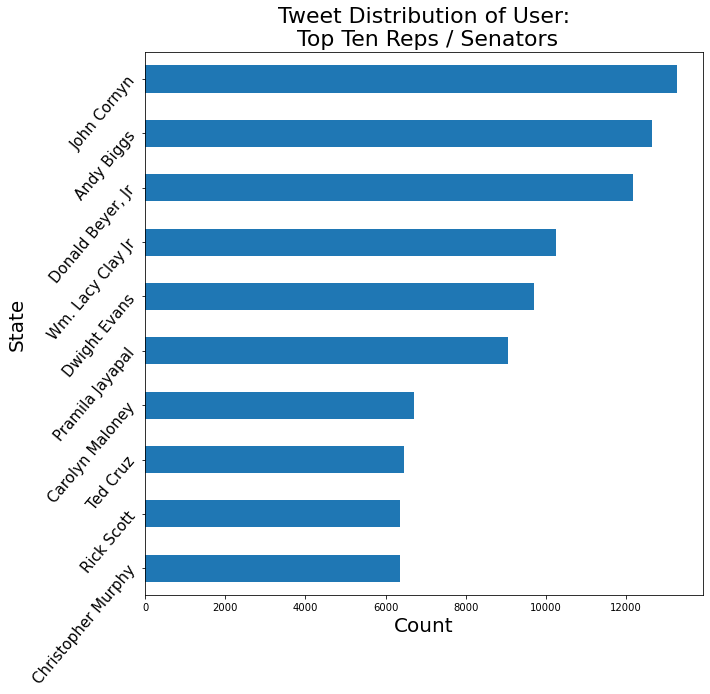

In [37]:
plt.figure(figsize=(10,10))

data['name'].value_counts()[:10].sort_values(ascending=True).plot(kind = 'barh')

plt.title('Tweet Distribution of User:\n Top Ten Reps / Senators', fontsize=22)

plt.xlabel('Count', fontsize=20)
plt.yticks(fontsize= 15)
plt.ylabel('State', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()